### Titanic--Survival Prediction

In [166]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder,StandardScaler, MinMaxScaler
from numpy import set_printoptions
import scipy.stats as stat
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import power_transform
from sklearn.feature_selection import SelectKBest, chi2
#from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

from sklearn import metrics, tree ,svm
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier,AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,roc_curve,auc, roc_auc_score
from sklearn.model_selection import GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier


###### Data Loading

In [167]:
pd.pandas.set_option('display.max_columns',None)
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


###### Checking the Dimensions of Dataset

In [168]:
df.shape

(891, 12)

#Dataset Description:
#Number of columns:12
#Number of rows: 891
#Number of Independent Columns:11
#Number of Dependent Column: 1

###### summary of a Dataset

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#Dataset has three data types: float64, int64, object 

###### check for missing or null values per column

In [170]:
df.isnull().sum(axis=0)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#Columns has no missing value except Age,Cabin and Outlet_Size and Embarked columns  has missing values.
#Age=177, Cabin=687 and Embarked =2 missing values.

###### Getting Each Attribute’s Data Type

In [171]:
print(df.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


###### TO check which column Type

###### Target Variable(Categorical)     : Survived
#Predictors Variables (Categorical):Pclass,Sex,SibSp,Parch,Embarked                                                          
#Predictors Variables (Continuous): PassengerId,Name,Age,Ticket,Fare,Cabin

In [172]:
df.nunique()   

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

###### Features in Dataset

In [173]:
# Countinuous Features in Dataset
numfeat = [cname for cname in df.columns if df[cname].dtype != 'O']
print("Number of continuous Features: {}".format(len(numfeat)))
print("Continuous Features: ",numfeat)


# Categorical features in Dataset
catfeat = [cname for cname in df.columns if df[cname].dtype == 'O']
print("\nNumber of Categorical Features: {}".format(len(catfeat)))
print("Categorical Features: ",catfeat)

Number of continuous Features: 7
Continuous Features:  ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

Number of Categorical Features: 5
Categorical Features:  ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


###### Statistical Descriptive

In [174]:
# Descriptive Continues features
df.describe(exclude=[object])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


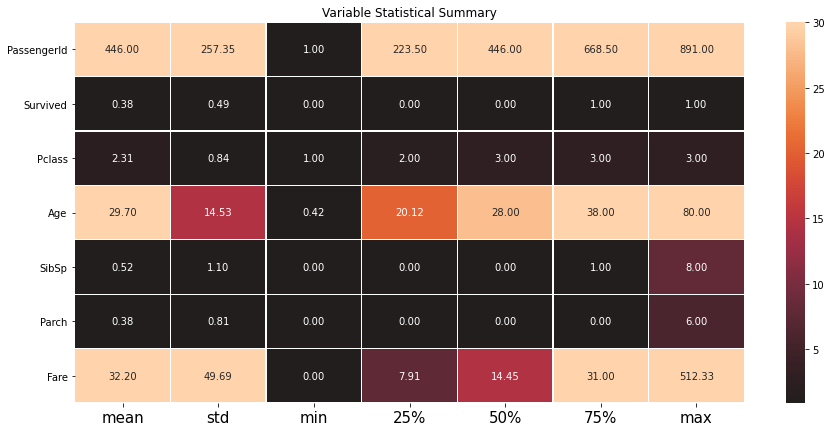

In [175]:
# Visualization of Statistical distribution of Data
plt.figure(figsize=(15,7)) 
sns.heatmap(round(df.describe()[1:].transpose(),2),vmin=.9, vmax=30, center=0,annot=True,fmt='.2f', linewidths=.1, )
plt.xticks(fontsize=15)
plt.yticks(fontsize=10)
plt.title("Variable Statistical Summary")
plt.show()

In [176]:
# Descriptive Categorical features
df.describe(include=[object])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Heikkinen, Miss. Laina",male,347082,G6,S
freq,1,577,7,4,644


###### Cardinality of All Features and Target in Dataset

Text(0.5, 1.0, 'Cardinality')

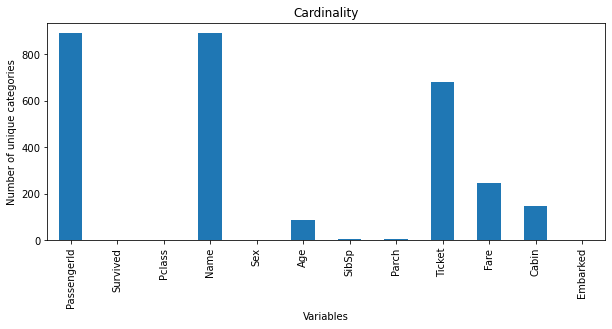

In [177]:
# Visualization of Cardinality of All Features and Target in Dataset
df.nunique().plot.bar(figsize=(10,4))
plt.ylabel('Number of unique categories')
plt.xlabel('Variables')
plt.title('Cardinality')

In [178]:
#cardinality check for Countinuous features
for i in numfeat:
    uval = len(df[i].unique())
    print("Cardinality of {} are     : {}".format(i, uval))

Cardinality of PassengerId are     : 891
Cardinality of Survived are     : 2
Cardinality of Pclass are     : 3
Cardinality of Age are     : 89
Cardinality of SibSp are     : 7
Cardinality of Parch are     : 7
Cardinality of Fare are     : 248


#high cardinality Countinuous features: PassengerId,Age,Fare                                                                
#low cardinality Countinuous features :Pclass,SibSp,Parch                                                                       
#low cardinality Target: Survived

In [179]:
#cardinality check for Categorical features:
for i in catfeat:
    uval = len(df[i].unique())
    print("Cardinality of {} are     : {}".format(i, uval))

Cardinality of Name are     : 891
Cardinality of Sex are     : 2
Cardinality of Ticket are     : 681
Cardinality of Cabin are     : 148
Cardinality of Embarked are     : 4


#high cardinality Categorical features: Name,Ticket,Cabin                                                                       
#low cardinality Categorical features :Sex,Embarked

###### check for duplicate rows

In [180]:
sum(df.duplicated())

0

###### Handling Missing

In [181]:
#Handling Missing values in Countinuous Features:
df[numfeat].isnull().sum(axis=0)

PassengerId      0
Survived         0
Pclass           0
Age            177
SibSp            0
Parch            0
Fare             0
dtype: int64

In [182]:
df['Age'].fillna(df['Age'].mean(), inplace=True)
df[numfeat].isnull().sum(axis=0)

PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64

In [183]:
#Handling Missing values in Categorical Features:

df[catfeat].isnull().sum(axis=0)

Name          0
Sex           0
Ticket        0
Cabin       687
Embarked      2
dtype: int64

In [184]:
df["Embarked"].fillna(df["Embarked"].mode()[0],inplace=True)
df["Cabin"].fillna(0,inplace=True)
df[catfeat].isnull().sum(axis=1)

0      0
1      0
2      0
3      0
4      0
      ..
886    0
887    0
888    0
889    0
890    0
Length: 891, dtype: int64

###### Encoding

In [185]:
# Encoding Categorical feature
#Embarked replace value
df['Embarked'].replace({'C':0, 'Q': 1,'S': 2}, inplace = True)
print(df['Embarked'].unique())

[2 0 1]


In [186]:
#Sex replace value
df['Sex'].replace({'female':0, 'male': 1}, inplace = True)
print(df['Sex'].unique())

[1 0]


In [187]:
df["Title"] = df["Name"].str.extract(" ([A-Za-z]+)\.")
df["Title"] = df["Title"].replace(["Ms", "Mlle"], "Miss")
df["Title"] = df["Title"].replace(["Mme", "Countess", "Lady", "Dona"], "Mrs")
df["Title"] = df["Title"].replace(["Dr", "Major", "Col", "Sir", "Rev", "Jonkheer", "Capt", "Don"], "Mr")
df = df.drop(["Name"], axis=1)

df['Title'] = df['Title'].map({"Mr": 0, "Miss": 1, "Mrs": 2, "Master": 3}).astype(int) 

In [188]:
df["TicketNumber"] = df["Ticket"].str.split()
df["TicketNumber"] = df["TicketNumber"].str[-1]
df["TicketNumber"] = LabelEncoder().fit_transform(df["TicketNumber"])
df = df.drop(["Ticket"], axis=1)

In [189]:
df=df.drop(["Cabin"],axis=1)
df.shape

(891, 11)

###### check for Outliers

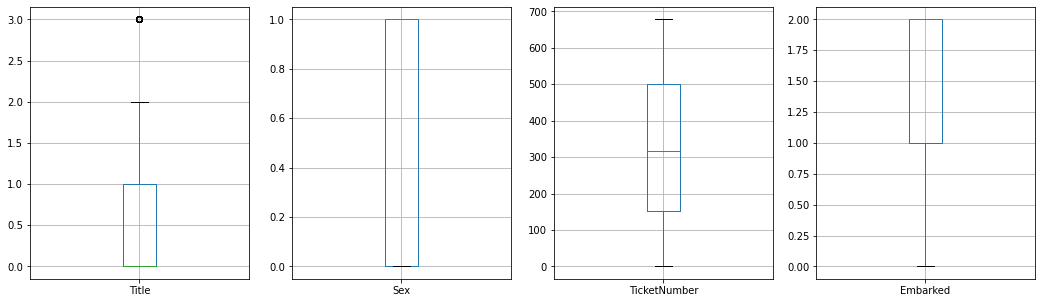

In [190]:
# check for Outliers for Categorical features
colslst1=['Title','Sex', 'TicketNumber', 'Embarked']
fig, pltcan=plt.subplots(nrows=1, ncols=len(colslst1), figsize=(18,5))
for predcol , i in zip(colslst1, range(len(colslst1))):
    df.boxplot(column=predcol, figsize=(2,10), vert=True, ax=pltcan[i])

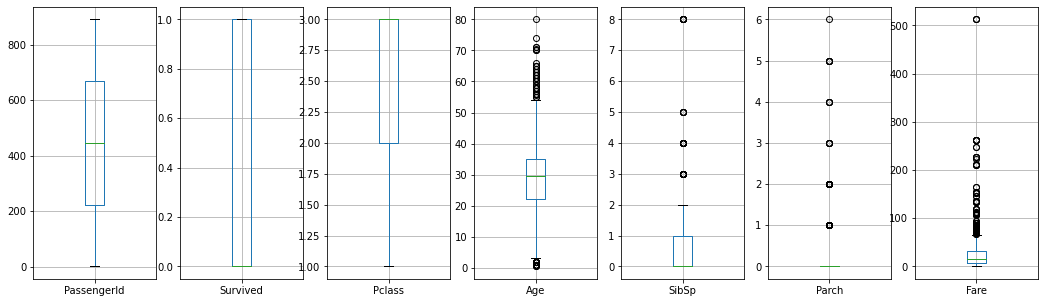

In [191]:
# check for Outliers for Continuous features
colslst1=['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
fig, pltcan=plt.subplots(nrows=1, ncols=len(colslst1), figsize=(18,5))
for predcol , i in zip(colslst1, range(len(colslst1))):
    df.boxplot(column=predcol, figsize=(2,10), vert=True, ax=pltcan[i])

###### remove outliers

In [192]:
# remove outliers from Categorica Features

#fout = ['Title']
#for f in fout:
#    q1 = df[f].quantile(0.25)
#    q3 = df[f].quantile(0.75)
#    IQR = q3-q1
#    lolimit = q1 - (IQR*1.5)
#    uplimit = q3 + (IQR*1.5)
#    df.loc[df[f]<lolimit,f] = lolimit
#    df.loc[df[f]>uplimit,f] = uplimit


In [193]:
# remove outliers from Continuous Features


fout = ['Age','SibSp','Parch','Fare']
for f in fout:
    q1 = df[f].quantile(0.25)
    q3 = df[f].quantile(0.75)
    IQR = q3-q1
    lolimit = q1 - (IQR*1.5)
    uplimit = q3 + (IQR*1.5)
    df.loc[df[f]<lolimit,f] = lolimit
    df.loc[df[f]>uplimit,f] = uplimit



###### Check for outlier after removel

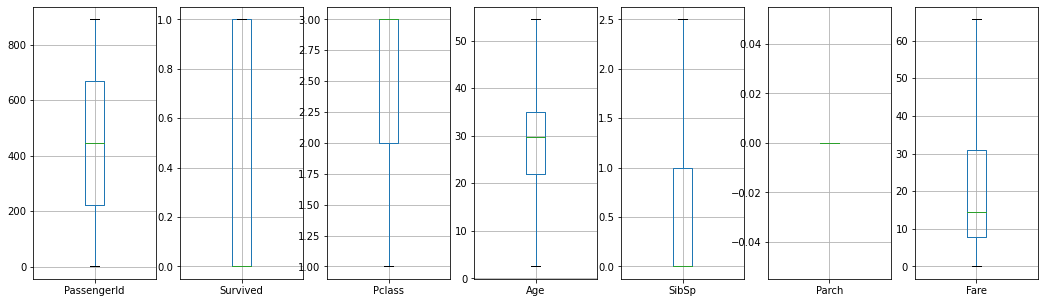

In [194]:

colslst1=['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
fig, pltcan=plt.subplots(nrows=1, ncols=len(colslst1), figsize=(18,5))
for predcol , i in zip(colslst1, range(len(colslst1))):
    df.boxplot(column=predcol, figsize=(2,10), vert=True, ax=pltcan[i])

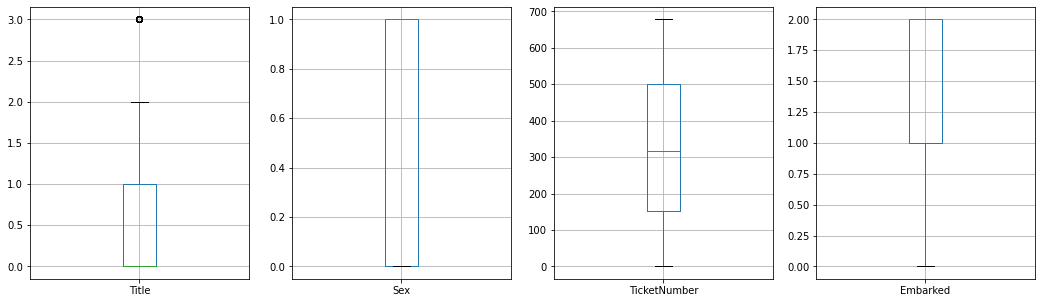

In [195]:
# check for Outliers for Categorical features
colslst1=['Title','Sex', 'TicketNumber', 'Embarked']
fig, pltcan=plt.subplots(nrows=1, ncols=len(colslst1), figsize=(18,5))
for predcol , i in zip(colslst1, range(len(colslst1))):
    df.boxplot(column=predcol, figsize=(2,10), vert=True, ax=pltcan[i])

###### Check for Skweness

In [196]:
df.skew()

PassengerId     0.000000
Survived        0.478523
Pclass         -0.630548
Sex            -0.618921
Age             0.080846
SibSp           1.621154
Parch           0.000000
Fare            1.082179
Embarked       -1.264823
Title           1.180669
TicketNumber    0.104705
dtype: float64

###### a) Exploring target variable:                                                                                                           #Univariate Analysis:

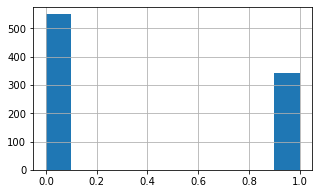

In [197]:
df['Survived'].hist(figsize=(5,3))
plt.show()

In [198]:
#from imblearn.over_sampling import SMOTE
#sm = SMOTE(random_state = 2)

###### Creating Graph for--------- Continuous(Predictor) variable          # Univariate Plot 
#Shows Slightly Right skewed distribution in Item_Visibility

array([[<AxesSubplot:title={'center':'PassengerId'}>,
        <AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Parch'}>],
       [<AxesSubplot:title={'center':'Fare'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

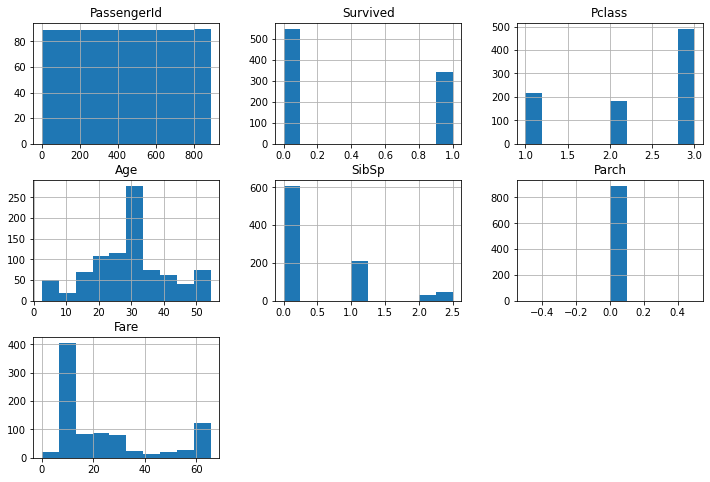

In [199]:
df[['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].hist(figsize=(12,8))


###### Creating Graph for------------ Categorical(Predictor) variable          # Univariate Plot 

array([[<AxesSubplot:title={'center':'Title'}>,
        <AxesSubplot:title={'center':'Sex'}>],
       [<AxesSubplot:title={'center':'TicketNumber'}>,
        <AxesSubplot:title={'center':'Embarked'}>]], dtype=object)

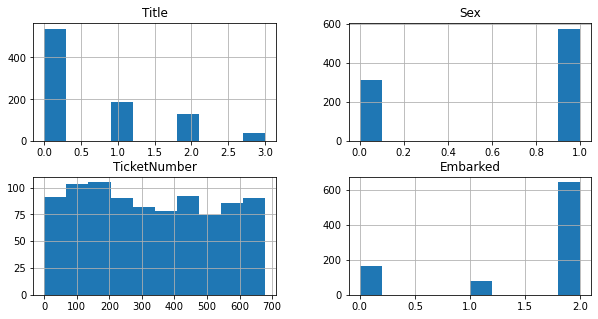

In [200]:
df[['Title', 'Sex', 'TicketNumber', 'Embarked']].hist(figsize=(10,5))

###### Anova Test 

In [201]:
from scipy.stats import f_oneway
cp=df.iloc[:,[0,1,2,3,4,5,6,7,8,9,10]]
sp=[]
for i in cp:
    cg=df.groupby('Survived')[i].apply(list)
    av=stat.f_oneway(*cg)
    if av[1]<0.5:
        print(i,'------correlated------:',av[1],'\n')
        sp.append(i)
    else:
        print(i,'------not correlated-----:',av[1],'\n')

PassengerId ------not correlated-----: 0.8813657768798144 

Survived ------correlated------: 0.0 

Pclass ------correlated------: 2.5370473879805644e-25 

Sex ------correlated------: 1.406066130879597e-69 

Age ------correlated------: 0.04939211675556946 

SibSp ------correlated------: 0.34865002922531974 

Parch ------not correlated-----: nan 

Fare ------correlated------: 2.6226599820092433e-22 

Embarked ------correlated------: 4.811092694585158e-07 

Title ------correlated------: 2.5115178215539634e-54 

TicketNumber ------correlated------: 2.848047514389187e-16 



###### Multivariate Analysis:Check for Correlation

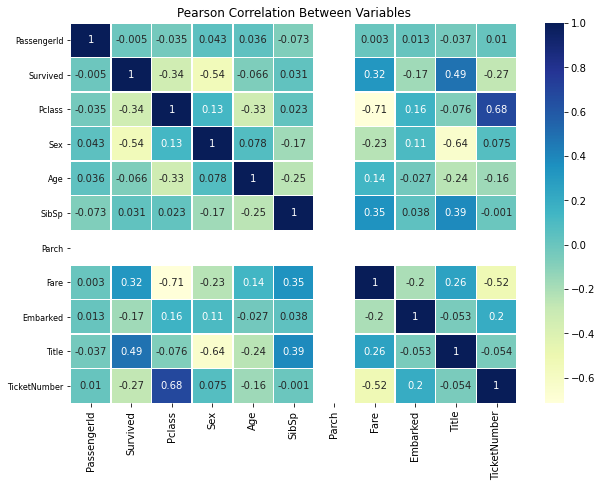

In [202]:
pcorrel = df.corr(method='pearson').round(3)
plt.figure(figsize=(10,7)) 
sns.heatmap(pcorrel,xticklabels=pcorrel.columns,yticklabels=pcorrel.columns,cmap="YlGnBu",annot=True,linewidth=0.5)
plt.title("Pearson Correlation Between Variables")
plt.xticks(fontsize=10)
plt.yticks(fontsize=8)
plt.show()

###### Check Strongly Related Features

In [203]:
cor = df.corr()
cor_target = abs(cor["Survived"])
strong_related = cor_target[cor_target>0.2]
print("Strongly Related:\n\n",strong_related,"\n")

weak_related = cor_target[cor_target<0.2]
print("Weak Relates:\n\n",weak_related)

Strongly Related:

 Survived        1.000000
Pclass          0.338481
Sex             0.543351
Fare            0.317430
Title           0.487314
TicketNumber    0.269326
Name: Survived, dtype: float64 

Weak Relates:

 PassengerId    0.005007
Age            0.065857
SibSp          0.031434
Embarked       0.167675
Name: Survived, dtype: float64


###### Importance of Data Feature Selection

In [204]:
# Feature Selection Techniques

x= df.iloc[:,0:11]  
y = df.iloc[:,1]

bestft = SelectKBest(score_func=chi2, k=10)
fit = bestft.fit(x,y)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

fscores = pd.concat([dfcolumns,dfscores],axis=1)
fscores.columns = ['Specs','Score']
fscores

,Specs,Score
0,PassengerId,3.312934
1,Survived,549.000000
2,Pclass,30.873699
3,Sex,92.702447
4,Age,19.117670
5,SibSp,1.034320
6,Parch,NaN
7,Fare,1564.437823
8,Embarked,10.202525
9,Title,265.441227


###### Feature Importance

In [205]:
from sklearn.ensemble import ExtraTreesRegressor
etr_model = ExtraTreesClassifier()
#etr_model = ExtraTreesRegressor()
etr_model.fit(x,y)
etr_model.feature_importances_

array([0.00423929, 0.75561455, 0.03128023, 0.09324177, 0.00605435,
       0.00774664, 0.        , 0.01689664, 0.00489701, 0.06698846,
       0.01304107])

###### removing less correlated feature

In [206]:
newdf=df.drop(["Parch","SibSp"],axis=1)
print(newdf.shape)


(891, 9)


###### Normalization

In [207]:
x=power_transform(x,method='yeo-johnson')
x

array([[-2.14814111, -0.78927234,  0.86397329, ...,  0.61041095,
        -0.80099495, -0.75127319],
       [-2.13183003,  1.2669898 , -1.45912855, ..., -1.78052001,
         1.42278547, -0.97175542],
       [-2.117043  ,  1.2669898 ,  0.86397329, ...,  0.61041095,
         1.00050291,  0.21392119],
       ...,
       [ 1.55071925, -0.78927234,  0.86397329, ...,  0.61041095,
         1.00050291,  1.4626513 ],
       [ 1.55371741,  1.2669898 , -1.45912855, ..., -1.78052001,
        -0.80099495, -2.02176209],
       [ 1.5567146 , -0.78927234,  0.86397329, ..., -1.23633916,
        -0.80099495,  1.25855353]])

###### Splitting data into Independent Features and Dependent Features

In [208]:
y=df.iloc[:,1]
x=df.iloc[:,[0,2,3,4,5,6,7,8]]

print(x.shape)
print(y.shape)



(891, 8)
(891,)


###### dividing the dataset in training and testing set

In [209]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 440)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(668, 8)
(668,)
(223, 8)
(223,)


###### Standarization

In [210]:
#sc = StandardScaler()
sc=MinMaxScaler()
x_train = sc.fit_transform(x_train)
print('x_train:\n',x_train)
x_test = sc.fit_transform(x_test)
print('\nx_test:\n',x_test)

x_train:
 [[0.55455568 0.         1.         ... 0.         0.75424168 0.        ]
 [0.712036   0.         1.         ... 0.         0.         1.        ]
 [0.12373453 0.         1.         ... 0.         0.79226747 1.        ]
 ...
 [0.02474691 1.         0.         ... 0.         0.12233219 0.5       ]
 [0.09336333 0.         1.         ... 0.         0.7176115  1.        ]
 [0.42069741 1.         0.         ... 0.         0.32109686 1.        ]]

x_test:
 [[0.16798196 1.         1.         ... 0.         0.1226491  1.        ]
 [0.30665163 0.         0.         ... 0.         1.         1.        ]
 [0.45208568 1.         0.         ... 0.         0.1319811  1.        ]
 ...
 [0.17361894 1.         1.         ... 0.         0.1226491  1.        ]
 [0.93122886 0.         0.         ... 0.         1.         1.        ]
 [0.17474634 1.         1.         ... 0.         0.1319811  1.        ]]


#### Model BUilding

###### model building using Logistic Regression 

In [211]:
clf = LogisticRegression()
LR=clf.fit(x_train,y_train)
pred=LR.predict(x_test)
print("Training accuracy :", clf.score(x_train, y_train))
print("Testing accuracy :", clf.score(x_test, y_test))

print(metrics.classification_report(y_test, pred))
print(metrics.confusion_matrix(y_test, pred))

f1sc=metrics.f1_score(y_test, pred, average='weighted')
print('Accuracy on testing data:', round(f1sc,2))

acval=cross_val_score(LR, x , y, cv=10, scoring='f1_weighted')
print('\n10-fold Cross Validation:')
print('Accuracy value :\n',acval)
print('\nFinal Average Accuracy :',round(acval.mean(),2))

Training accuracy : 0.7964071856287425
Testing accuracy : 0.7757847533632287
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       138
           1       0.72      0.68      0.70        85

    accuracy                           0.78       223
   macro avg       0.76      0.76      0.76       223
weighted avg       0.77      0.78      0.77       223

[[115  23]
 [ 27  58]]
Accuracy on testing data: 0.77

10-fold Cross Validation:
Accuracy value :
 [0.78347578 0.77388248 0.75756502 0.8309621  0.78588533 0.74942095
 0.75497104 0.75981111 0.79319719 0.80944134]

Final Average Accuracy : 0.78


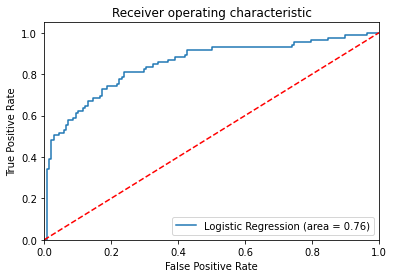

In [212]:

rocauc = roc_auc_score(y_test,pred)
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % rocauc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


In [213]:
penalty = ['l1', 'l2', 'elasticnet']
C=[0.1, 0.2, 0.3, 0.4, 0.5]
max_iter = [10, 50,5,90, 200, 110, 500, 1000]
solver=['newton-cg', 'liblinear', 'sag', 'saga']
verbose = [1,5,4,10,30,15,20,100]
class_weight = [{1:0.5, 0:0.5}, {1:0.4, 0:0.6}, {1:0.6, 0:0.4}, {1:0.7, 0:0.3}]
multi_class=['ovr', 'multinomial']
n_jobs= [1,5,10, 100,200,500]


param_distributions = dict(penalty=penalty,
                           C=C,
                           max_iter=max_iter,
                           solver=solver,
                           verbose=verbose,
                           class_weight=class_weight,
                           multi_class=multi_class,
                           n_jobs=n_jobs)

random = RandomizedSearchCV(estimator=clf,
                            param_distributions=param_distributions,
                            scoring='roc_auc',
                            verbose=1, n_jobs=-1,
                            n_iter=1000)
random_result = random.fit(x_train, y_train)

print('Best Score: ', random_result.best_score_)
print('Best Params: ', random_result.best_params_)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits
max_iter reached after 0 seconds
Best Score:  0.8537248874096985
Best Params:  {'verbose': 15, 'solver': 'sag', 'penalty': 'l2', 'n_jobs': 200, 'multi_class': 'multinomial', 'max_iter': 5, 'class_weight': {1: 0.4, 0: 0.6}, 'C': 0.5}


[Parallel(n_jobs=200)]: Using backend ThreadingBackend with 200 concurrent workers.
[Parallel(n_jobs=200)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=200)]: Done   1 out of   1 | elapsed:    0.1s finished


###### model building using Support Vector Machines(SVM)

In [214]:
clf = svm.SVC(probability=True)
SVM=clf.fit(x_train,y_train)
pred=SVM.predict(x_test)
print("Training accuracy :", SVM.score(x_train, y_train))
print("Testing accuracy :", SVM.score(x_test, y_test))

print(metrics.classification_report(y_test, pred))
print(metrics.confusion_matrix(y_test, pred))

f1sc=metrics.f1_score(y_test, pred, average='weighted')
print('Accuracy on testing data:', round(f1sc,2))

acval=cross_val_score(SVM, x , y, cv=10, scoring='f1_weighted')
print('\nCross Validation:')
print('Accuracy value:',acval)
print('\nFinal Average Accuracy:', round(acval.mean(),2))

Training accuracy : 0.8218562874251497
Testing accuracy : 0.820627802690583
              precision    recall  f1-score   support

           0       0.82      0.91      0.86       138
           1       0.83      0.67      0.74        85

    accuracy                           0.82       223
   macro avg       0.82      0.79      0.80       223
weighted avg       0.82      0.82      0.82       223

[[126  12]
 [ 28  57]]
Accuracy on testing data: 0.82

Cross Validation:
Accuracy value: [0.46360153 0.47206617 0.47206617 0.47206617 0.47206617 0.47206617
 0.47206617 0.47206617 0.47206617 0.45823839]

Final Average Accuracy: 0.47


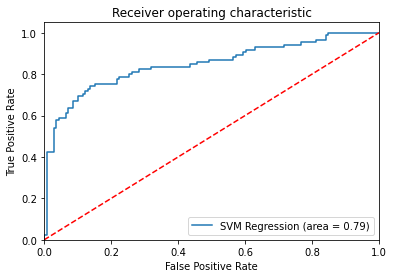

In [215]:
rocauc = roc_auc_score(y_test,pred)
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='SVM Regression (area = %0.2f)' % rocauc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('SVM_ROC')
plt.show()


In [216]:
C=[0.1, 0.2, 0.3, 0.4, 0.5]
kernel=['linear', 'rbf']
gamma=[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
degree=[1,2,4,8,10,20]
coef0=[1.5,3.4,5.6,9.2,10.2]
max_iter = [10, 50,5,90, 200, 110, 500, 1000]
verbose = [1,5,4,10,30,15,20,100]
class_weight = [{1:0.5, 0:0.5}, {1:0.4, 0:0.6}, {1:0.6, 0:0.4}, {1:0.7, 0:0.3}]
decision_function_shape=['ovo','ovr']
random_state= [1,5,10, 100,200,500]


param_distributions = dict(C=C,
                           kernel=kernel,
                           gamma=gamma,
                           degree=degree,
                           coef0=coef0,
                           max_iter=max_iter,
                           verbose=verbose,
                           class_weight=class_weight,
                           decision_function_shape=decision_function_shape,
                           random_state=random_state)

random = RandomizedSearchCV(estimator=clf,
                            param_distributions=param_distributions,
                            scoring='roc_auc',
                            verbose=1, n_jobs=-1,
                            n_iter=1000)
random_result = random.fit(x_train, y_train)

print('Best Score: ', random_result.best_score_)
print('Best Params: ', random_result.best_params_)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits
[LibSVM]Best Score:  0.8619353254536744
Best Params:  {'verbose': 100, 'random_state': 100, 'max_iter': 1000, 'kernel': 'rbf', 'gamma': 0.1, 'degree': 2, 'decision_function_shape': 'ovo', 'coef0': 5.6, 'class_weight': {1: 0.4, 0: 0.6}, 'C': 0.4}


###### model building using Decision Trees

In [217]:
clf = tree.DecisionTreeClassifier(max_depth=6,criterion='entropy')
DTree=clf.fit(x_train,y_train)
pred=DTree.predict(x_test)
print("Training accuracy :", DTree.score(x_train, y_train))
print("Testing accuracy :", DTree.score(x_test, y_test))

print(metrics.classification_report(y_test, pred))
print(metrics.confusion_matrix(y_test, pred))

f1sc=metrics.f1_score(y_test, pred, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(f1sc,2))

#fimp = pd.Series(DTree.feature_importances_, index=pred)
#fimp.nlargest(10).plot(kind='barh')

acval=cross_val_score(DTree, x , y, cv=10, scoring='f1_weighted')
print('\nCross Validation:')
print('Accuracy values:\n',acval)
print('\nFinal Average Accuracy :', round(acval.mean(),2))

Training accuracy : 0.8667664670658682
Testing accuracy : 0.8071748878923767
              precision    recall  f1-score   support

           0       0.81      0.91      0.85       138
           1       0.81      0.65      0.72        85

    accuracy                           0.81       223
   macro avg       0.81      0.78      0.79       223
weighted avg       0.81      0.81      0.80       223

[[125  13]
 [ 30  55]]
Accuracy of the model on Testing Sample Data: 0.8

Cross Validation:
Accuracy values:
 [0.70226596 0.77830713 0.72468837 0.84348731 0.87301025 0.78065407
 0.78442417 0.72150067 0.84409818 0.7945888 ]

Final Average Accuracy : 0.78


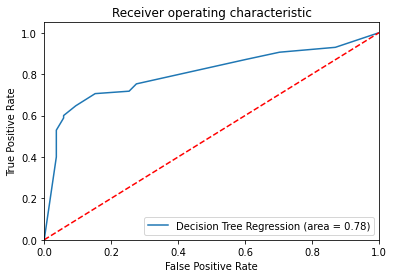

In [218]:
rocauc = roc_auc_score(y_test,pred)
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree Regression (area = %0.2f)' % rocauc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROC')
plt.show()


In [219]:
criterion = ['gini', 'entropy']
splitter=['best','random']
max_depth = [2,4,6,8,10,12]
min_samples_split=[1,5,3,1.5,3.9,10,15]
min_weight_fraction_leaf=[1.4,3.5,2.6,9.3,1.2,0.5]
max_features=['auto','sqrt','log2']
ccp_alpha = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
max_leaf_nodes=[4,6,12,10,25,50]
class_weight = [{1:0.5, 0:0.5}, {1:0.4, 0:0.6}, {1:0.6, 0:0.4}, {1:0.7, 0:0.3}]


param_distributions = dict(criterion = criterion,
                           splitter=splitter,
                           max_depth=max_depth,
                           min_samples_split=min_samples_split,
                           min_weight_fraction_leaf=min_weight_fraction_leaf,
                           max_features=max_features,
                           ccp_alpha=ccp_alpha,
                           max_leaf_nodes=max_leaf_nodes,
                           class_weight=class_weight)                      

random = RandomizedSearchCV(estimator=clf,
                            param_distributions=param_distributions,
                            scoring='roc_auc',
                            verbose=1, n_jobs=-1,
                            n_iter=1000)
random_result = random.fit(x_train, y_train)

print('Best Score: ', random_result.best_score_)
print('Best Params: ', random_result.best_params_)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits
Best Score:  0.5036824485891918
Best Params:  {'splitter': 'best', 'min_weight_fraction_leaf': 0.5, 'min_samples_split': 3, 'max_leaf_nodes': 10, 'max_features': 'auto', 'max_depth': 8, 'criterion': 'gini', 'class_weight': {1: 0.6, 0: 0.4}, 'ccp_alpha': 0.001}


###### model building using Random Forest

In [220]:
clf = RandomForestClassifier()
RF=clf.fit(x_train,y_train)
pred=RF.predict(x_test)
print("Training accuracy :", RF.score(x_train, y_train))
print("Testing accuracy :", RF.score(x_test, y_test))

print(metrics.classification_report(y_test, pred))
print(metrics.confusion_matrix(y_test, pred))

f1sc=metrics.f1_score(y_test, pred, average='weighted')
print('Accuracy on testing data:', round(f1sc,2))

Accuracy_Values=cross_val_score(RF, x , y, cv=10, scoring='f1_weighted')
print('\nCross Validation')
print('Accuracy values:',Accuracy_Values)
print('\nFinal Average Accuracy:', round(Accuracy_Values.mean(),2))


Training accuracy : 1.0
Testing accuracy : 0.8385650224215246
              precision    recall  f1-score   support

           0       0.84      0.91      0.87       138
           1       0.84      0.72      0.77        85

    accuracy                           0.84       223
   macro avg       0.84      0.82      0.82       223
weighted avg       0.84      0.84      0.84       223

[[126  12]
 [ 24  61]]
Accuracy on testing data: 0.84

Cross Validation
Accuracy values: [0.79884454 0.76527186 0.72838378 0.85596104 0.89857726 0.80374311
 0.84054061 0.77021909 0.83190886 0.81798726]

Final Average Accuracy: 0.81


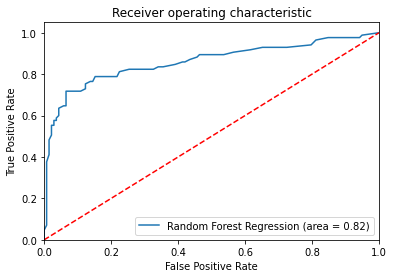

In [221]:

rocauc = roc_auc_score(y_test,pred)
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest Regression (area = %0.2f)' % rocauc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('RF_ROC')
plt.show()


In [222]:
n_estimators=[10, 50,5,90, 200, 110, 500, 1000]
criterion = ['gini', 'entropy']
max_depth = [2,4,6,8,10,12]
min_samples_split=[1,5,3,1.5,3.9,10,15]
min_samples_leaf=[1.4,3,2.6,9.3,1.2,0.5,2,6,10]
min_weight_fraction_leaf=[1.4,3.5,2.6,9.3,1.2,0.5]
max_features=['auto','sqrt','log2']
max_leaf_nodes=[4,6,12,10,25,50]
class_weight = [{1:0.5, 0:0.5}, {1:0.4, 0:0.6}, {1:0.6, 0:0.4}, {1:0.7, 0:0.3}]
verbose = [1,5,4,10,30,15,20,100]
random_state= [1,5,10, 100,200,500]
n_jobs= [1,5,10, 100,200,500]

param_distributions = dict(n_estimators=n_estimators,
                           criterion = criterion,
                           max_depth = max_depth,
                           min_samples_split=min_samples_split,
                           min_samples_leaf=min_samples_leaf,
                           min_weight_fraction_leaf=min_weight_fraction_leaf,
                           max_features=max_features,
                           max_leaf_nodes=max_leaf_nodes,
                           class_weight = class_weight,
                           verbose = verbose,
                           random_state= random_state,
                           n_jobs= n_jobs)

random = RandomizedSearchCV(estimator=clf,
                            param_distributions=param_distributions,
                            scoring='roc_auc',
                            verbose=1, n_jobs=-1,
                            n_iter=1000)
random_result = random.fit(x_train, y_train)

print('Best Score: ', random_result.best_score_)
print('Best Params: ', random_result.best_params_)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 90
building tree 2 of 90
building tree 3 of 90
building tree 4 of 90
building tree 5 of 90
building tree 6 of 90
building tree 7 of 90
building tree 8 of 90
building tree 9 of 90
building tree 10 of 90
building tree 11 of 90
building tree 12 of 90
building tree 13 of 90
building tree 14 of 90
building tree 15 of 90
building tree 16 of 90
building tree 17 of 90
building tree 18 of 90
building tree 19 of 90
building tree 20 of 90
building tree 21 of 90
building tree 22 of 90
building tree 23 of 90
building tree 24 of 90
building tree 25 of 90
building tree 26 of 90
building tree 27 of 90
building tree 28 of 90
building tree 29 of 90
building tree 30 of 90
building tree 31 of 90
building tree 32 of 90
building tree 33 of 90
building tree 34 of 90
building tree 35 of 90
building tree 36 of 90
building tree 37 of 90
building tree 38 of 90
building tree 39 of 90
building tree 40 of 90
building tree 41 of 90
building tree 42 of 90
building tree 43 of 90
building tree 44 of 

[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:    0.3s finished


###### model building using Adaboost 

In [223]:
clf = AdaBoostClassifier()
AB=clf.fit(x_train,y_train)
pred=AB.predict(x_test)
print("Training accuracy :", AB.score(x_train, y_train))
print("Testing accuracy :", AB.score(x_test, y_test))

print(metrics.classification_report(y_test, pred))
print(metrics.confusion_matrix(y_test, pred))

f1sc=metrics.f1_score(y_test, pred, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(f1sc,2))

acval=cross_val_score(AB, x , y, cv=10, scoring='f1_weighted')
print('\nCross Validation')
print('Accuracy values:',acval)
print('\nFinal Average Accuracy :', round(acval.mean(),2))


Training accuracy : 0.8562874251497006
Testing accuracy : 0.8116591928251121
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       138
           1       0.78      0.71      0.74        85

    accuracy                           0.81       223
   macro avg       0.80      0.79      0.80       223
weighted avg       0.81      0.81      0.81       223

[[121  17]
 [ 25  60]]
Accuracy of the model on Testing Sample Data: 0.81

Cross Validation
Accuracy values: [0.26420387 0.75063202 0.7588364  0.64452915 0.80046614 0.79319719
 0.80711636 0.82497932 0.80842372 0.48331311]

Final Average Accuracy : 0.69


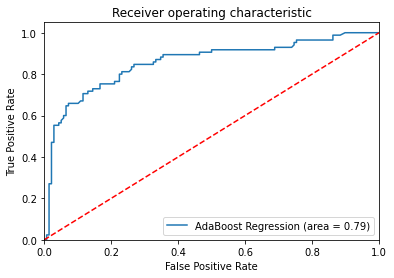

In [224]:

rocauc = roc_auc_score(y_test,pred)
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AdaBoost Regression (area = %0.2f)' % rocauc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('AdaBoost_ROC')
plt.show()


In [225]:
n_estimators=[2,4,6,8,10,12]
learning_rate=[1.5,3.4,5.6,9.2,10.2]
random_state=[1,5,10, 100,200,500]
algorithm=['SAMME','SAMME.R']




param_distributions = dict(n_estimators=n_estimators,
                           learning_rate=learning_rate,
                           random_state=random_state,
                           algorithm=algorithm)

random = RandomizedSearchCV(estimator=clf,
                            param_distributions=param_distributions,
                            scoring='roc_auc',
                            verbose=1, n_jobs=-1,
                            n_iter=1000)
random_result = random.fit(x_train, y_train)

print('Best Score: ', random_result.best_score_)
print('Best Params: ', random_result.best_params_)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits
Best Score:  0.8362932416122939
Best Params:  {'random_state': 1, 'n_estimators': 8, 'learning_rate': 1.5, 'algorithm': 'SAMME'}


###### model building using K-Nearest Neighbor(KNN)

In [226]:
clf = KNeighborsClassifier()
KNN=clf.fit(x_train,y_train)
pred=KNN.predict(x_test)
print("Training accuracy :", KNN.score(x_train, y_train))
print("Testing accuracy :", KNN.score(x_test, y_test))

print(metrics.classification_report(y_test, pred))
print(metrics.confusion_matrix(y_test, pred))

f1sc=metrics.f1_score(y_test, pred, average='weighted')
print('Accuracy on testing data:', round(f1sc,2))

acval=cross_val_score(KNN, x , y, cv=10, scoring='f1_weighted')
print('\nCross Validation:')
print('Accuracy values:',acval)
print('\nFinal Average Accuray:', round(acval.mean(),2))


Training accuracy : 0.8592814371257484
Testing accuracy : 0.8161434977578476
              precision    recall  f1-score   support

           0       0.83      0.88      0.86       138
           1       0.78      0.72      0.75        85

    accuracy                           0.82       223
   macro avg       0.81      0.80      0.80       223
weighted avg       0.81      0.82      0.81       223

[[121  17]
 [ 24  61]]
Accuracy on testing data: 0.81

Cross Validation:
Accuracy values: [0.34804905 0.47206617 0.39060439 0.44210044 0.46884176 0.48919036
 0.45417422 0.46613845 0.57905503 0.48331311]

Final Average Accuray: 0.46


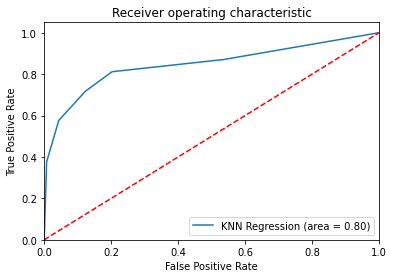

In [227]:

rocauc = roc_auc_score(y_test,pred)
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNN Regression (area = %0.2f)' % rocauc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('KNN_ROC')
plt.show()


In [228]:
n_neighbors= [1,5,4,10,30,15,20,100]
weights=['uniform','distance']
algorithm=['auto','ball_tree','kd_tree','brute']
leaf_size=[1,2,4,6,12,10,25,50]
p=[1,2,5,7,10,20,24]
n_jobs= [1,5,10, 100,200,500]

param_distributions = dict(n_neighbors=n_neighbors,
                           weights=weights,
                           algorithm=algorithm,
                           leaf_size=leaf_size,
                           p=p,
                           n_jobs= n_jobs)

random = RandomizedSearchCV(estimator=clf,
                            param_distributions=param_distributions,
                            scoring='roc_auc',
                            verbose=1, n_jobs=-1,
                            n_iter=1000)
random_result = random.fit(x_train, y_train)

print('Best Score: ', random_result.best_score_)
print('Best Params: ', random_result.best_params_)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits
Best Score:  0.8627495081307461
Best Params:  {'weights': 'distance', 'p': 1, 'n_neighbors': 15, 'n_jobs': 1, 'leaf_size': 6, 'algorithm': 'auto'}


###### model building using Naive Bays

In [229]:
clf = GaussianNB()
NB=clf.fit(x_train,y_train)
pred=NB.predict(x_test)
print("Training accuracy :", NB.score(x_train, y_train))
print("Testing accuracy :", NB.score(x_test, y_test))

print(metrics.classification_report(y_test, pred))
print(metrics.confusion_matrix(y_test, pred))

f1sc=metrics.f1_score(y_test, pred, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(f1sc,2))

acval=cross_val_score(NB,x , y, cv=10, scoring='f1_weighted')
print('\nCross Validation:')
print('Accuracy values:',acval)
print('\nFinal Average Accuracy:', round(acval.mean(),2))

Training accuracy : 0.7559880239520959
Testing accuracy : 0.7757847533632287
              precision    recall  f1-score   support

           0       0.84      0.78      0.81       138
           1       0.68      0.76      0.72        85

    accuracy                           0.78       223
   macro avg       0.76      0.77      0.77       223
weighted avg       0.78      0.78      0.78       223

[[108  30]
 [ 20  65]]
Accuracy of the model on Testing Sample Data: 0.78

Cross Validation:
Accuracy values: [0.66938637 0.72266463 0.7752809  0.80046614 0.76732168 0.7646724
 0.78708455 0.78874499 0.76572213 0.80944134]

Final Average Accuracy: 0.77


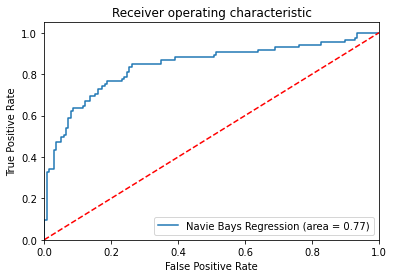

In [230]:

rocauc = roc_auc_score(y_test,pred)
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Navie Bays Regression (area = %0.2f)' % rocauc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('NB_ROC')
plt.show()


In [231]:
#var_smoothing=np.logspace(0,-9, num=100)
#priors=[None]
var_smoothing=[0.00000001, 0.000000001, 0.00000001]
priors=[[1, 0], [1, 1],[0,1]]
param_distributions = dict(priors=priors,
                           var_smoothing=var_smoothing)

random = RandomizedSearchCV(estimator=clf,
                            param_distributions=param_distributions,
                            scoring='roc_auc',
                            verbose=1, n_jobs=-1,
                            n_iter=1000)
random_result = random.fit(x_train, y_train)

print('Best Score: ', random_result.best_score_)
print('Best Params: ', random_result.best_params_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best Score:  0.5
Best Params:  {'var_smoothing': 1e-08, 'priors': [1, 0]}


#####  K-Nearest Neighbor(KNN) as the final model 

###### full dataset Separate into Target Variable and Predictor Variables

In [ ]:
x = newdf.iloc[:,:9]
y = newdf.iloc[:,-1]

X=x.values
Y=y.values

PScaler=MinMaxScaler()
PScalerFit=PScaler.fit(X)

X=PScalerFit.transform(X)

print(X.shape)
print(y.shape)

###### Retraining the Model

In [241]:
clf =KNeighborsClassifier(weights='distance', p=1, n_neighbors=15, n_jobs=1)

finalLM=clf.fit(x,y)

print("Accuracy :", finalLM.score(x, y))

paccval=cross_val_score(finalLM, x , y, cv=5, scoring='f1_weighted')
print('\nCross Validation')
print('Accuracy values:',acval)
print('\nFinal Average Accuracy of the model:', round(acval.mean(),2))

Accuracy : 1.0

Cross Validation
Accuracy values: [0.66938637 0.72266463 0.7752809  0.80046614 0.76732168 0.7646724
 0.78708455 0.78874499 0.76572213 0.80944134]

Final Average Accuracy of the model: 0.77


###### Model Saving

In [248]:
import pickle
filename='TitanicSurvival.pk1'
pickle.dump(model,open(filename,'wb'))
print("Model Saved")

Model Saved
